# Intern Name: Himanshu Nirwan

## Task : Exploratory Data Analysis (EDA) on Retail Dataset

In [296]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [299]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [300]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [301]:
df.drop(["Country", "Postal Code"], axis=1, inplace=True)

In [302]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [303]:
df.shape

(9994, 11)

In [304]:
df.duplicated().sum()

50

In [305]:
df.drop_duplicates(inplace=True)

In [306]:
df.duplicated().sum()

0

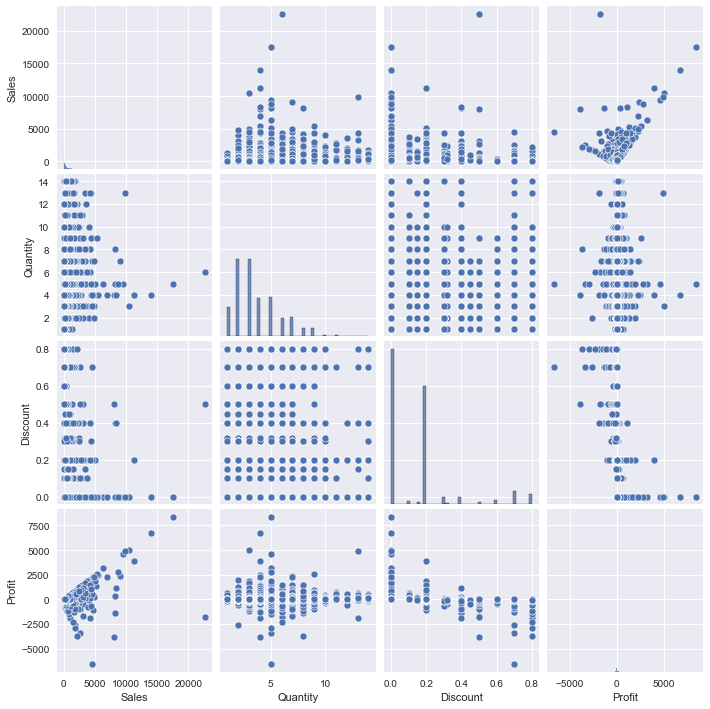

In [307]:
sns.pairplot(df)

1. As Discount increases Profit decreases
2. As Discount increases Sales decrease
3. As Sales increase Profit increases 

In [308]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


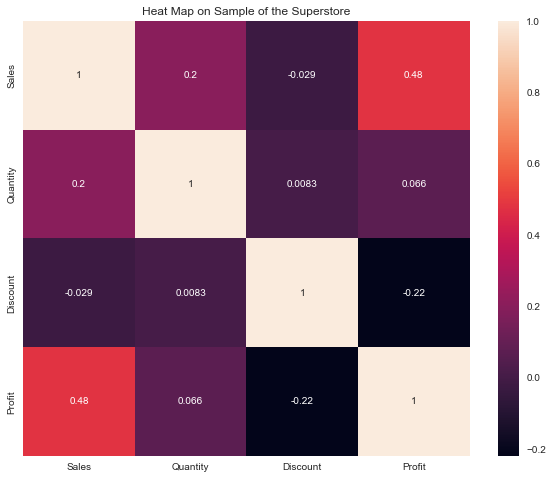

In [309]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Map on Sample of the Superstore")
plt.show()

1. Most correlation: Sales and Profit
2. Least correlation: Discount and Quantity

In [310]:
df["Ship Mode"].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

In [311]:
import plotly.express as px

fig = px.histogram(df, x='Ship Mode')

fig.update_layout(title='Count of Ship Mode')
fig.show()


1. Most used Ship Mode: Standard Class
2. Least used Ship Mode: Same Day

In [312]:
ps=df.groupby("Ship Mode")[["Profit","Sales"]].sum()
ps

,Profit,Sales
Ship Mode,,
First Class,48910.4477,3.512746e+05
Same Day,15871.8869,1.283217e+05
Second Class,57425.5716,4.591240e+05
Standard Class,163889.6517,1.355879e+06


In [313]:
fig = px.bar(ps, title="Profit v/s Sales")

fig.update_layout(xaxis_title="Index", yaxis_title="Profit and Sales", width=900, height=700)

fig.show()


1. Maximum Profit and Sales : Standard Class
2. Minimum Profit and Sales : Same Day

In [314]:
cat=df["Category"].value_counts()
cat

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

In [315]:
colors_list=["lightcoral","pink","lightblue"]
fig = px.pie(cat, values=cat.values, names=cat.index, 
             hole=0.3,  # Size of the hole in the middle of the pie chart
             color_discrete_sequence=colors_list,
             title="Category",
             )


fig.update_layout(legend_title="Categories", legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

fig.show()


Major distribution of business is in Office Supplies and Least in Technology

In [316]:
# Sales
cs=df.groupby("Category").Sales.sum()
# Profit
cp=df.groupby("Category").Profit.sum()

In [317]:
fig = go.Figure()

# Sales bar chart
fig.add_trace(go.Bar(x=cs.index, y=cs.values, name="Sales", marker_color="lightskyblue"))

# Profit bar chart
fig.add_trace(go.Bar(x=cp.index, y=cp.values, name="Profit", marker_color="lightcoral"))

fig.update_layout(title="Category wise Sales and Profit", xaxis_title="Category", yaxis_title="Total Sales and Profit")

fig.show()


1. Maximum Profit and Sales in Category: Technology
2. Minimum Profit and Sales in Category: Office Supplies

### Sub-Category

In [318]:
sub=df["Sub-Category"].value_counts()
sub

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [319]:
fig = px.pie(values=sub.values, names=sub.index, title="Sub-Category")

fig.show()


1. Major distribution of business is in Binders, Paper and Furnishings
2. Least distribution of business is in Copiers, Machines and Supplies

## Category and Sub-Category

In [320]:
x=df.groupby(["Category","Sub-Category"]).Sales.sum()
y=df.groupby(["Category","Sub-Category"]).Profit.sum()

### Sales

In [321]:
fig = go.Figure()

# Furniture 
fig.add_trace(go.Bar(y=x["Furniture"].index, x=x["Furniture"].values, orientation='h', name='Furniture'))

# Technology 
fig.add_trace(go.Bar(y=x["Technology"].index, x=x["Technology"].values, orientation='h', name='Technology'))

# Office Supplies
fig.add_trace(go.Bar(y=x["Office Supplies"].index, x=x["Office Supplies"].values, orientation='h', name='Office Supplies'))

# Total
fig.add_trace(go.Bar(y=x.index, x=x.values, orientation='h', name='All Sub-Categories'))

fig.update_layout(barmode='stack', title="Sales by Sub-Categories", height=800, width=1000,
                  yaxis_title="Sub-Categories", xaxis_title="Sales")

fig.show()


1. Maximum Sales in : Phones(Technology), Chairs(Furniture) and Storage(Office Supplies)
2. Minimum Sales in : Fasteners, Labels and Envelopes (Office Supplies)

### Profit

In [322]:
fig = go.Figure()

# Furniture 
fig.add_trace(go.Bar(y=x["Furniture"].index, x=y["Furniture"].values, orientation='h', name='Furniture'))

# Technology 
fig.add_trace(go.Bar(y=x["Technology"].index, x=y["Technology"].values, orientation='h', name='Technology'))

# Office Supplies
fig.add_trace(go.Bar(y=x["Office Supplies"].index, x=y["Office Supplies"].values, orientation='h', name='Office Supplies'))

# Total
fig.add_trace(go.Bar(y=x.index, x=y.values, orientation='h', name='All Sub-Categories'))

fig.update_layout(barmode='stack', title="Sales by Sub-Categories", height=800, width=1000,
                  yaxis_title="Sub-Categories", xaxis_title="Sales")

fig.show()


1. Maximum Profit in : Copiers, Phones and Accessories (Technology)
2. Loss in : Tables and Bookcases (Furniture) and Supplies (Office Supplies)

In [323]:
state=df["State"].value_counts()
state

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [324]:
fig = px.bar(state, x=state.index, y=state.values, labels={"x": "States", "y": "Number of Buyers"},
             title="Distribution of Buyers in each State")

fig.update_layout(xaxis_title="States", yaxis_title="Number of Buyers")

fig.show()


1. Most buyers belong to "California", "New York" and "Texas"
2. Least buyers belong to "Wyoming", "West Virginia" and "North Dakota"

In [325]:
ss=df.groupby(["State"]).Sales.sum()
sp=df.groupby(["State"]).Profit.sum()

In [326]:
fig1 = px.bar(x=ss.index, y=ss.values, labels={"x": "States", "y": "Sales"},
              title="State-wise Distribution of Sales")

fig2 = px.bar(x=sp.index, y=sp.values, labels={"x": "States", "y": "Profit"},
              title="State-wise Distribution of Profit")

fig1.update_layout(xaxis_title="States", yaxis_title="Sales")

fig2.update_layout(xaxis_title="States", yaxis_title="Profit")

fig1.show()
fig2.show()


1. Maximum Sales and Profit in cities: "California" and "New York" 
2. Minimum Sales and Profit in cities: "Oregon", "Florida" , "Arizona", "Tennessee", "Colorado",       "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas" 

### Segment

In [327]:
seg=df["Segment"].value_counts()
seg

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

In [328]:
fig = px.pie(names=seg.index, values=seg.values, 
             title="Segment", 
             color_discrete_sequence=["lightcoral", "pink", "lightblue"])

fig.show()


Major business distribution in Consumer Segment and Least in Home Office

### Sales and Profit in different segments

In [329]:
fig = px.bar(df.groupby("Segment")[["Sales","Profit"]].sum().reset_index(),
             x="Segment", 
             y=["Sales", "Profit"],
             barmode="group",
             title="Sales and Profit distribution among segments",
             labels={"Segment": "Segment", "value": "Sales and Profit"},
             color_discrete_sequence=["lightskyblue", "lightcoral"])

fig.update_xaxes(title="Segment")
fig.update_yaxes(title="Sales and Profit")

fig.show()


Most Profit and Sales in Consumer segment and least in Home Office

### Region

In [330]:
reg=df["Region"].value_counts()
reg

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

In [331]:
fig = px.pie(names=reg.index, values=reg.values, 
             title="Region", 
             color_discrete_sequence=["lightcoral", "pink", "lightblue", "lightsalmon"])

fig.show()


Company deals majorly in Western Region and least in Southern Region

In [332]:
fig = px.bar(df.groupby("Region")[["Sales","Profit"]].sum().reset_index().sort_values(by=["Sales","Profit"],ascending=False),
             x="Region", 
             y=["Sales", "Profit"],
             barmode="group",
             title="Sales and Profit distribution among regions",
             labels={"Region": "Region", "value": "Sales and Profit"},
             color_discrete_sequence=["cornflowerblue", "lightsalmon"])

fig.update_xaxes(title="Region")
fig.update_yaxes(title="Sales and Profit")

fig.show()


More Profit from Western and Eastern Regions whereas lesser profits from Central and Southern regions

## Conclusion

1. Reduction in discounts to raise Profit and Sales
2. Increase in focus on Standard Class as it brings most profit and sales 
3. Shifting the major distribution of business towards Technology(most profitable) from Office Supplies(least profitable)
4. Technology: More emphasis should be laid on Copiers, Phones and Accessories, bringing maximum profits.
5. Work to uplift sales in cities which are facing losses such as "Oregon", "Florida", "Arizona", "Tennessee", "Colorado", "North Carolina", "Ilionis", "Pennsylvania", "Ohio" and "Texas"
6. Keep focus over the cities of most buyers and most sales and profit, that is "California" and "New york".
7. "Consumer segment" should be encouraged as it is bringing most sales and profit.
8. Western and Eastern regions should be focussed upon for major chunk of sales and profit